# Exploring data using Pandas

Our first task in this week's lesson is to learn how to **read and explore data files in Python**. We will focus on using [pandas](https://pandas.pydata.org/pandas-docs/stable/) which is an open-source package for data analysis in Python. Pandas is an excellent toolkit for working with **real world data** that often have a tabular structure (rows and columns).

We will first get familiar with **pandas data structures**: *DataFrame* and *Series*:

![Pandas data structures](img/pandas-structures.png)

- **Pandas DataFrame** (a 2-dimensional data structure) is used for storing and mainpulating table-like data (data with rows and columns) in Python. You can think of pandas DataFrame as a programmable spreadsheet. 
- **Pandas Series** (a 1-dimensional data structure) is used for storing and manipulating an sequence of values. Pandas Series is kind of like a list, but more clever. One row or one column in a Pandas DataFrame is actually a Pandas Series. 

These Pandas structures incorporate a number of things we've already encountered, such as indices, data stored in a collection, and data types. Let's have another look at the Pandas data structures below with some additional annotation.

![Pandas data structures](img/pandas-structures-annotated.png)

As you can see, both DataFrames and Series in pandas have an index that can be used to select values, but they also have column labels to identify columns in DataFrames. In the lesson this week we'll use many of these features to explore real-world data and learn some useful data analysis procedures.

For a comprehensive overview of pandas data structures you can have a look at Chapter 5 in Wes MacKinney's book [Python for Data Analysis (2nd Edition, 2017)](https://geo-python.github.io/site/course-info/resources.html#books) and [Pandas online documentation about data structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html).

<div class="alert alert-info">

**Note**
Pandas is a "high-level" package, which means that it makes use of several other packages, such as [NumPy](https://numpy.org/), in the background. There are several ways in which data can be read from a file in Python, and this year we have decided to focus primarily on pandas because it is easy-to-use, efficient and intuitive. If you are curoius about other approaches for interacting with data files, you can find lesson materials from previous years about reading data using [NumPy](https://geo-python.github.io/site/2018/notebooks/L5/numpy/1-Exploring-data-using-numpy.html#Reading-a-data-file-with-NumPy) or [built-in Python functions](https://geo-python.github.io/site/2017/lessons/L5/reading-data-from-file.html). 
 
</div>


## Input data: weather statistics

Our input data is a text file containing weather observations from Kumpula, Helsinki, Finland retrieved from [NOAA](https://www.ncdc.noaa.gov/)*:

- File name: [Kumpula-June-2016-w-metadata.txt](Kumpula-June-2016-w-metadata.txt)
- The file is available in the binder and CSC notebook instances, under L5 folder 
- The data file contains observed daily mean, minimum, and maximum temperatures from June 2016 recorded from the Kumpula weather observation station in Helsinki.
- There are 30 rows of data in this sample data set.
- The data has been derived from a data file of daily temperature measurments downloaded from [NOAA](https://www.ncdc.noaa.gov/cdo-web/).


\*US National Oceanographic and Atmospheric Administration's National Centers for Environmental Information climate database

## Reading a data file with Pandas


Now we're ready to read in our temperature data file. **First, we need to import the Pandas module.** It is customary to import pandas as `pd`:


In [1]:
import pandas as pd

**Next, we'll read the input data file**, and store the contents of that file into a variable called `data` Using the `pandas.read_csv()` function:

In [2]:
# Read the file using pandas
data = pd.read_csv('Kumpula-June-2016-w-metadata.txt')

<div class="alert alert-info">

**Reading data from different formats**
    
`pandas.read_csv()` is a general function for reading data files separated by commas, spaces, or other common separators. 
Here we only provided one argument (the filepath) to the `pd.read_csv()` method. For a full list of available parameters, please refer to [pandas documentation for pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), or run `help(pd.read_csv)`.
    
Pandas has several different functions for parsing input data from different formats. There is, for example, a separate function for reading Excel files `read_excel`. Another useful function is `read_pickle` for reading data stored in the [Python pickle format](https://docs.python.org/3/library/pickle.html). Check out [pandas documentation about input and output functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-tools-text-csv-hdf5) and Chapter 6 in [MacKinney (2017): Python for Data Analysis](https://geo-python.github.io/site/course-info/resources.html#books) for more details about reading data.
 
</div>


If all goes as planned, you should now have a new variable `data` in memory that contains the input data. You can check the the contents of this variable by calling `data` or `print(data)`:

In [3]:
print(data)

       # Data file contents: Daily temperatures (mean            min  \
0                 #                     for June 1-30           2016   
1   # Data source: https://www.ncdc.noaa.gov/cdo-w...            NaN   
2   # Data processing: Extracted temperatures from...   converted to   
3           #                  comma-separated format            NaN   
4                                                   #            NaN   
5                          # David Whipp - 02.10.2017            NaN   
6                                            YEARMODA           TEMP   
7                                            20160601           65.5   
8                                            20160602           65.8   
9                                            20160603           68.4   
10                                           20160604           57.5   
11                                           20160605           51.4   
12                                           20160606           

This looks OK, but there are some strange values present such as `NaN`, and the first lines of the dataframe look a bit weird.. 

`NaN` stands for "not a number", and might indicate some problem with reading in the contents of the file. Plus, we expected about 30 lines of data, but the index values go up to 36 when we print the contents of the `data` variable. Looks like we need to investigate this further.

As we can observe, there are some metadata at the top of the file giving basic information about its contents and source. This isn't data we want to process, so we need to skip over that part of the file when we load it.

Here are the 8 first rows of data in the text file (note that the 8th row is blank):

```
# Data file contents: Daily temperatures (mean, min, max) for Kumpula, Helsinki
#                     for June 1-30, 2016
# Data source: https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND
# Data processing: Extracted temperatures from raw data file, converted to
#                  comma-separated format
#
# David Whipp - 02.10.2017

```

Fortunately, that's easy to do in pandas, we just need to add the `skiprows` parameter when we read the file, listing the number of rows to skip (8 in this case).

Let's try reading the datafile again, and this time defining the `skiprows` parameter.

In [4]:
data = pd.read_csv('Kumpula-June-2016-w-metadata.txt', skiprows=8)

Let's now print the dataframe and see what changed:

In [5]:
print(data)

    YEARMODA  TEMP   MAX   MIN
0   20160601  65.5  73.6  54.7
1   20160602  65.8  80.8  55.0
2   20160603  68.4   NaN  55.6
3   20160604  57.5  70.9  47.3
4   20160605  51.4  58.3  43.2
5   20160606  52.2  59.7  42.8
6   20160607  56.9  65.1  45.9
7   20160608  54.2   NaN  47.5
8   20160609  49.4  54.1  45.7
9   20160610  49.5  55.9  43.0
10  20160611  54.0  62.1  41.7
11  20160612  55.4  64.2  46.0
12  20160613  58.3  68.2  47.3
13  20160614  59.7  67.8  47.8
14  20160615  63.4  70.3  49.3
15  20160616  57.8  67.5  55.6
16  20160617  60.4  70.7  55.9
17  20160618  57.3   NaN  54.0
18  20160619  56.3  59.2  54.1
19  20160620  59.3  69.1  52.2
20  20160621  62.6  71.4  50.4
21  20160622  61.7  70.2  55.4
22  20160623  60.9  67.1  54.9
23  20160624  61.1  68.9  56.7
24  20160625  65.7  75.4  57.9
25  20160626  69.6  77.7  60.3
26  20160627  60.7  70.0   NaN
27  20160628  65.4  73.0  55.8
28  20160629  65.8  73.2   NaN
29  20160630  65.7  72.7  59.2


After reading in the data, it is always good to check that everything went well (like we just did with the print-statement above). The challenge can also be that large datafiles might not nicely print on screen using the `print()`-function so it might be better to look at only the top 5-10 lines of the file rather than loading the entire thing. 

We can  use `pandas.DataFrame.head` to quickly check the contents of the dataframe. This method returns the first n rows for the dataframe. By default, it returns 5 first rows of the DataFrame:

In [6]:
data.head()

,YEARMODA,TEMP,MAX,MIN
0,20160601,65.5,73.6,54.7
1,20160602,65.8,80.8,55.0
2,20160603,68.4,NaN,55.6
3,20160604,57.5,70.9,47.3
4,20160605,51.4,58.3,43.2


We can also check the last rows of the data using `data.tail()`:

In [7]:
data.tail()

,YEARMODA,TEMP,MAX,MIN
25,20160626,69.6,77.7,60.3
26,20160627,60.7,70.0,NaN
27,20160628,65.4,73.0,55.8
28,20160629,65.8,73.2,NaN
29,20160630,65.7,72.7,59.2


Note that Pandas that DataFrames have **labelled axes (rows and columns)**.  In our sample data, the rows labeled with an index value (`0` to `29`), and columns labelled `YEARMODA`, `TEMP`, `MAX`, and `MIN`. Later on, we will learn how to use these labels for selecting and updating subsets of the data.

**Let's also confirm the data type of our data variable:**

In [8]:
type(data)

pandas.core.frame.DataFrame

No surprises here, our data variable is a Pandas DataFrame ;).

<div class="alert alert-info">

**Note**

 We can use [IPython magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html#line-magics) to figure out what variables we have in memory. IPython magic command `%who` will display names of those variables that you have defined during this session. Magic command `%whose` prints out more information about these variables.
    
    
</div>

In [9]:
# Display variable names:
%who

data	 pd	 


In [10]:
# Display variable name, type and info
%whos

Variable   Type         Data/Info
---------------------------------
data       DataFrame        YEARMODA  TEMP   MAX <...>0160630  65.7  72.7  59.2
pd         module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>


## DataFrame properties

We now have some basic Python skills and the ability to read in data from a file for processing. A normal first step when you load new data is to explore the dataset a bit to understand how the data is structured, and what kind of values are stored in there.

Let's start by checking the size of our data frame. We can use the `len()` function similarly as with lists to check how many rows we have:**

In [11]:
# Print number of rows using len()-function
print(len(data))

30


We can also get a quick sense of the size of the dataset using the `shape` attribute.


In [12]:
# Print dataframe shape
print(data.shape)

(30, 4)


Here we see that our dataset has 30 rows, 4 columns, just as we saw above when printing out the whole DataFrame.

**We can also check the column names we have in our DataFrame.** We already saw the column names when we checked the 5 first rows using `data.head()`, but often it is useful to access only the column names. You can call `data.columns` (returns the an index object) or `data.columns.values` (returns a list of column values) to check the column names:

In [13]:
#Print column values
print(data.columns.values)

['YEARMODA' 'TEMP' 'MAX' 'MIN']


We can also find information about the row identifiers using the `index` attribute:

In [14]:
#Print index
print(data.index)

RangeIndex(start=0, stop=30, step=1)


Here we see how the data is indexed, starting at 0, ending at 30, and with an increment of 1 between each value. This is basically the same way in which Python lists are indexed, however, pandas allows also other ways of identifying the rows. DataFrame indices could, for example, be character strings, or date objects (you will learn more about re-setting the index later). Eventually, the "length" of the DataFrame (the number of rows) is actually the length of the index:

In [15]:
#Check length of the index
len(data.index)

30

What about the data types of each column in our dataFrame? We can check the data type of all the columns at once using `pandas.DataFrame.dtypes`:

In [16]:
# Print data types
print(data.dtypes)

YEARMODA      int64
TEMP        float64
MAX         float64
MIN         float64
dtype: object


Here we see that `YEARMODA` is an integer value (with 64-bit precision; int64), while the other values are all decimal values with 64-bit precision (float64).

## Selecting columns

In pandas, we select columns based on the column values (columns names). The basic syntax is `dataframe[value]`, where value can be a single column name, or a list of column names. Let's start by selecting two columns, `'YEARMODA'` and `'TEMP'`:

In [17]:
selection = data[['YEARMODA','TEMP']]
print(selection)

    YEARMODA  TEMP
0   20160601  65.5
1   20160602  65.8
2   20160603  68.4
3   20160604  57.5
4   20160605  51.4
5   20160606  52.2
6   20160607  56.9
7   20160608  54.2
8   20160609  49.4
9   20160610  49.5
10  20160611  54.0
11  20160612  55.4
12  20160613  58.3
13  20160614  59.7
14  20160615  63.4
15  20160616  57.8
16  20160617  60.4
17  20160618  57.3
18  20160619  56.3
19  20160620  59.3
20  20160621  62.6
21  20160622  61.7
22  20160623  60.9
23  20160624  61.1
24  20160625  65.7
25  20160626  69.6
26  20160627  60.7
27  20160628  65.4
28  20160629  65.8
29  20160630  65.7


Let's also check the data type of this selection:

In [18]:
type(selection)

pandas.core.frame.DataFrame

The subset is still a pandas DataFrame, and we are able to use all the methods related to a pandas DataFrame also with this subset. For example, we can check the shape:

In [19]:
selection.shape

(30, 2)

We can also access a single column of the data based on the column name:

In [20]:
data['TEMP']

0     65.5
1     65.8
2     68.4
3     57.5
4     51.4
5     52.2
6     56.9
7     54.2
8     49.4
9     49.5
10    54.0
11    55.4
12    58.3
13    59.7
14    63.4
15    57.8
16    60.4
17    57.3
18    56.3
19    59.3
20    62.6
21    61.7
22    60.9
23    61.1
24    65.7
25    69.6
26    60.7
27    65.4
28    65.8
29    65.7
Name: TEMP, dtype: float64

What about the type of the column itself?

In [21]:
# Check datatype of the column
type(data['TEMP'])

pandas.core.series.Series

**Each column (and each row) in a pandas data frame is actually a pandas Series** - a 1 dimensional data structure!

<div class="alert alert-info">

**Note**

You can also retreive a column using a different syntax:
    
``` 
data.TEMP
```
This syntax works only if the column name is a valid name for a Python variable (e.g. the column name should not contain whitespace).
The syntax `data["column"]` works for all kinds of column names, so we recommend using this approach :)
</div>

In [22]:
type(data.TEMP)

pandas.core.series.Series

## Descriptive statistics

Pandas DataFrames and Series contain useful methods for getting summary statistics. Available methods include `mean()`, `median()`, `min()`, `max()`, and `std()` (the standard deviation).

We could, for example, check the mean temperature in our inpu data. We check the mean for a single column (*Series*): 

In [23]:
# Check mean value of a column
data['TEMP'].mean()

59.730000000000004

and for all columns (in the *DataFrame*):

In [24]:
# Check mean value for all columns
data.mean()

YEARMODA    2.016062e+07
TEMP        5.973000e+01
MAX         6.804074e+01
MIN         5.125714e+01
dtype: float64

For an overview of the basic statistics for all attributes in the data, we can use the `describe()` method:


In [25]:
# Get descriptive statistics
data.describe()

,YEARMODA,TEMP,MAX,MIN
count,3.000000e+01,30.000000,27.000000,28.000000
mean,2.016062e+07,59.730000,68.040741,51.257143
std,8.803408e+00,5.475472,6.505575,5.498985
min,2.016060e+07,49.400000,54.100000,41.700000
25%,2.016061e+07,56.450000,64.650000,46.975000
50%,2.016062e+07,60.050000,69.100000,53.100000
75%,2.016062e+07,64.900000,72.050000,55.600000
max,2.016063e+07,69.600000,80.800000,60.300000


## Extra: Very basic plots

Pandas comes with a handful of plotting methods, which all rely on the plotting library [matplotlib](https://matplotlib.org/). 

For very basic plots, we don’t need to import matplotlib separately, but we need to run a magic command %matplotlib inline in order to make the plots visible in our notebook:

In [26]:
%matplotlib inline

We can already achieve very simple plots using the `DataFrame.plot` -method. Let's plot all the columns that contain values related to temperatures:

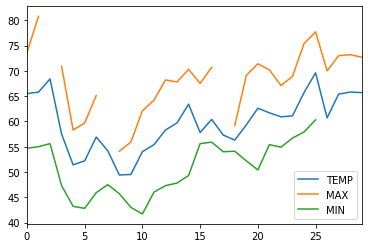

In [27]:
data[["TEMP", "MAX", "MIN"]].plot()

We can could also at the distribution of temperature values using a boxplot visualization:

Now, you might want to start modifying the plots by adding axis labels, color settings and other formatting. For anythin more advanced, we should import matplotlib (`import matplotlib.pyplot as plt`). We will learn more about matplotlib and plotting data during week 7 :)

## Extra: From lists to pandas objects

Most often we create pandas objects by reading in data from an external source, such as a text file. Here, we will briefly see how you can create pandas objects from Python lists. If you have long lists of numbers, for instance, creating a Pandas Series will allow you to interact with these values more efficiently in terms of computing time.

In [28]:
# Create Pandas Series from a list
number_series = pd.Series([ 4, 5, 6, 7.0])
print(number_series)

0    4.0
1    5.0
2    6.0
3    7.0
dtype: float64


Note that Pandas is smart about the conversion, detecting a single floating point value (`7.0`) and assigning all values in the Series the data type float64.

If needed, you can also set a custom index when creating the object:

In [29]:
number_series = pd.Series([ 4, 5, 6, 7.0], index=['a','b','c','d'])
print(number_series)

a    4.0
b    5.0
c    6.0
d    7.0
dtype: float64


In [30]:
type(number_series)

pandas.core.series.Series

How about combining several lists as a DataFrame? Let's take a subset of the lists we used in Exercise 3, problem 3 and see how we could combine those as a pandas DataFrame:

In [31]:
# Station names
stations = ['Hanko Russarö', 'Heinola Asemantaus', 'Helsinki Kaisaniemi', 'Helsinki Malmi airfield']

# Latitude coordinates of Weather stations  
lats = [59.77, 61.2, 60.18, 60.25]

# Longitude coordinates of Weather stations 
lons = [22.95, 26.05, 24.94, 25.05]

Often we indeed create pandas DataFrames by reading in data (e.g. using `pd.read_csv(filename.csv)`), but sometimes your might also combine lists into a DataFrame inside the script using the `pandas.DataFrame` constructor. Here, we are using a *Python dictionary* `{"column_1": list_1, "column_2": list_2, ...}` to indicate the structure of our data. 

In [32]:
new_data = pd.DataFrame(data = {"station_name" : stations, "lat" : lats, "lon" : lons})
new_data

,station_name,lat,lon
0,Hanko Russarö,59.77,22.95
1,Heinola Asemantaus,61.20,26.05
2,Helsinki Kaisaniemi,60.18,24.94
3,Helsinki Malmi airfield,60.25,25.05


In [33]:
type(new_data)

pandas.core.frame.DataFrame

Often, you might start working with an empty data frame in stead of existing lists:

In [34]:
df = pd.DataFrame()

In [35]:
print(df)

Empty DataFrame
Columns: []
Index: []


Check more details about available paramenters and methods from [the pandas.DataFrame documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas-dataframe).

That's it! Next, we will have a look at [basic operations for data analysis in Pandas](processing-data-with-pandas.ipynb).